In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src import preprocess
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
acceptor = pd.read_csv('./PreprocessData/acceptor.csv')
acceptor_y = acceptor.Class
acceptor_X = acceptor.drop('Class', axis=1)

In [3]:
seq_to_Vmatrix = []
for i in range(len(acceptor_X)):
    seq_to_Vmatrix.append(preprocess.transform_seq_to_Vmatrix(acceptor_X.at[i, 'Seq']))

In [4]:
seq_to_Vmatrix = np.asarray(seq_to_Vmatrix)

In [5]:
# Splitting data
Xv_train, xv_test, Yv_train, yv_test = train_test_split(seq_to_Vmatrix, acceptor_y, test_size=0.2, random_state=0)

In [6]:
# Reshaping data
Xv_train = Xv_train.reshape(Xv_train.shape[0], Xv_train.shape[1], Xv_train.shape[2], 1)
xv_test = xv_test.reshape(xv_test.shape[0], xv_test.shape[1], xv_test.shape[2], 1)

In [7]:
Yv_train = to_categorical(Yv_train, 2)

In [8]:
# Load models
acceptor_Vmodel_1 = load_model('./Models/accp_Vmodel_1.hf5')
acceptor_Vmodel_2 = load_model('./Models/accp_Vmodel_2.hf5')
acceptor_Vmodel_3 = load_model('./Models/accp_Vmodel_3.hf5')

c:\program files\python36\lib\site-packages\keras\engine\saving.py:305: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [9]:
early_stopping = EarlyStopping()

In [64]:
acceptor_Vmodel_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 1, 70)         910       
_________________________________________________________________
dropout_1 (Dropout)          (None, 38, 1, 70)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 1, 100)        21100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 1, 100)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 1, 100)        30100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 1, 100)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 17, 1, 100)        0         
__________

In [10]:
# Recompiling 1st CNN model of Acceptor Sequences
acceptor_Vmodel_1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
acceptor_Vmodel_1_history = acceptor_Vmodel_1.fit(Xv_train, Yv_train, batch_size=64, epochs=30,
                                            validation_split=0.2, callbacks=[early_stopping])

Train on 281643 samples, validate on 70411 samples
Epoch 1/30
281643/281643 [==============================] - 373s 1ms/step - loss: 0.2304 - acc: 0.9119 - val_loss: 0.2028 - val_acc: 0.9240
Epoch 2/30
281643/281643 [==============================] - 364s 1ms/step - loss: 0.2088 - acc: 0.9216 - val_loss: 0.1832 - val_acc: 0.9319
Epoch 3/30
281643/281643 [==============================] - 355s 1ms/step - loss: 0.2074 - acc: 0.9228 - val_loss: 0.1935 - val_acc: 0.9256


In [65]:
acceptor_Vmodel_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 36, 1, 70)         1470      
_________________________________________________________________
dropout_6 (Dropout)          (None, 36, 1, 70)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 1, 100)        21100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 34, 1, 100)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1741312   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
__________

In [12]:
# Recompiling 2nd CNN model of Acceptor Sequences
acceptor_Vmodel_2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
acceptor_Vmodel_2_history = acceptor_Vmodel_2.fit(Xv_train, Yv_train, batch_size=64, epochs=30,
                                            validation_split=0.2, callbacks=[early_stopping])

Train on 281643 samples, validate on 70411 samples
Epoch 1/30
281643/281643 [==============================] - 369s 1ms/step - loss: 0.2056 - acc: 0.9223 - val_loss: 0.1754 - val_acc: 0.9350
Epoch 2/30
281643/281643 [==============================] - 331s 1ms/step - loss: 0.1931 - acc: 0.9284 - val_loss: 0.1864 - val_acc: 0.9345


In [66]:
acceptor_Vmodel_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40, 4, 128)        256       
_________________________________________________________________
flatten_4 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 40962     
Total params: 41,218
Trainable params: 41,218
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Recompiling Simple Neural Network of Acceptor Sequences
acceptor_Vmodel_3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
acceptor_Vmodel_3_history = acceptor_Vmodel_3.fit(Xv_train, Yv_train, batch_size=64, epochs=30,
                                            validation_split=0.2, callbacks=[early_stopping])

Train on 281643 samples, validate on 70411 samples
Epoch 1/30
281643/281643 [==============================] - 141s 502us/step - loss: 0.2383 - acc: 0.9070 - val_loss: 0.2341 - val_acc: 0.9083
Epoch 2/30
281643/281643 [==============================] - 141s 499us/step - loss: 0.2328 - acc: 0.9097 - val_loss: 0.2323 - val_acc: 0.9086
Epoch 3/30
281643/281643 [==============================] - 138s 490us/step - loss: 0.2319 - acc: 0.9103 - val_loss: 0.2344 - val_acc: 0.9082


## Plotting Graphs

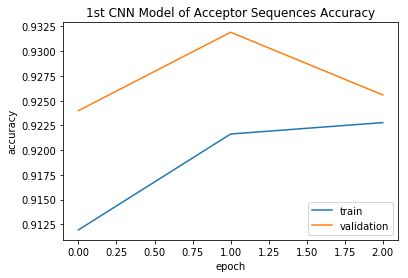

In [14]:
# Plotting graphs
# summarize history for accuracy
plt.plot(acceptor_Vmodel_1_history.history['acc'])
plt.plot(acceptor_Vmodel_1_history.history['val_acc'])
plt.title('1st CNN Model of Acceptor Sequences Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

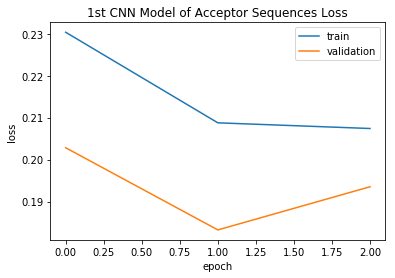

In [15]:
# summarize history for loss
plt.plot(acceptor_Vmodel_1_history.history['loss'])
plt.plot(acceptor_Vmodel_1_history.history['val_loss'])
plt.title('1st CNN Model of Acceptor Sequences Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

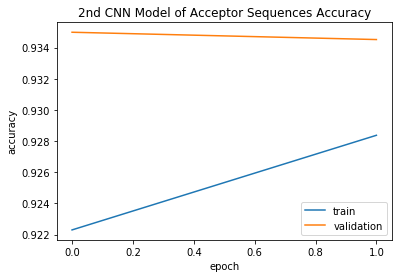

In [16]:
plt.plot(acceptor_Vmodel_2_history.history['acc'])
plt.plot(acceptor_Vmodel_2_history.history['val_acc'])
plt.title('2nd CNN Model of Acceptor Sequences Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

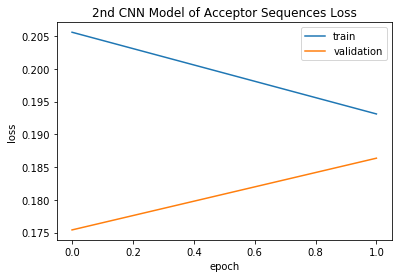

In [17]:
plt.plot(acceptor_Vmodel_2_history.history['loss'])
plt.plot(acceptor_Vmodel_2_history.history['val_loss'])
plt.title('2nd CNN Model of Acceptor Sequences Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

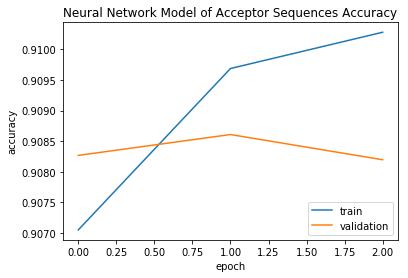

In [18]:
plt.plot(acceptor_Vmodel_3_history.history['acc'])
plt.plot(acceptor_Vmodel_3_history.history['val_acc'])
plt.title('Neural Network Model of Acceptor Sequences Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

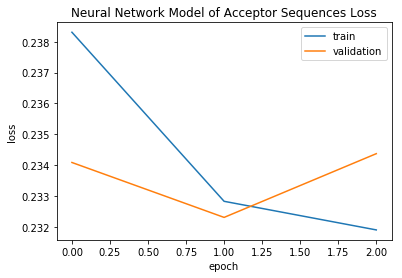

In [19]:
plt.plot(acceptor_Vmodel_3_history.history['loss'])
plt.plot(acceptor_Vmodel_3_history.history['val_loss'])
plt.title('Neural Network Model of Acceptor Sequences Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [22]:
# Testing 1st CNN model of Acceptor Sequence
y1_predict_classes = acceptor_Vmodel_1.predict_classes(xv_test)
print("Confusion matrix:\n{0}".format(metrics.confusion_matrix(yv_test, y1_predict_classes)))
# Precision and accuracy:
print("Classification report:\n{0}".format(metrics.classification_report(yv_test, y1_predict_classes)))
print("Classification accuracy: {0}".format(metrics.accuracy_score(yv_test, y1_predict_classes)))

Confusion matrix:
[[38709  5051]
 [ 1431 42823]]
Classification report:
             precision    recall  f1-score   support

          0       0.96      0.88      0.92     43760
          1       0.89      0.97      0.93     44254

avg / total       0.93      0.93      0.93     88014

Classification accuracy: 0.9263526257186356


In [23]:
y2_predict_classes = acceptor_Vmodel_2.predict_classes(xv_test)
print("2nd CNN Model - Confusion matrix:\n{0}".format(metrics.confusion_matrix(yv_test, y2_predict_classes)))
# Precision and accuracy:
print("2nd CNN Model - Classification report:\n{0}".format(metrics.classification_report(yv_test, y2_predict_classes)))
print("2nd CNN Model - Classification accuracy: {0}".format(metrics.accuracy_score(yv_test, y2_predict_classes)))

2nd CNN Model - Confusion matrix:
[[40715  3045]
 [ 2681 41573]]
2nd CNN Model - Classification report:
             precision    recall  f1-score   support

          0       0.94      0.93      0.93     43760
          1       0.93      0.94      0.94     44254

avg / total       0.93      0.93      0.93     88014

2nd CNN Model - Classification accuracy: 0.9349421682914082


In [24]:
y3_predict_classes = acceptor_Vmodel_3.predict_classes(xv_test)
print("Neural Network Model - Confusion matrix:\n{0}".format(metrics.confusion_matrix(yv_test, y3_predict_classes)))
# Precision and accuracy:
print("Neural Network Model - Classification report:\n{0}".format(metrics.classification_report(yv_test, y3_predict_classes)))
print("Neural Network Model - Classification accuracy: {0}".format(metrics.accuracy_score(yv_test, y3_predict_classes)))

Neural Network Model - Confusion matrix:
[[38522  5238]
 [ 2708 41546]]
Neural Network Model - Classification report:
             precision    recall  f1-score   support

          0       0.93      0.88      0.91     43760
          1       0.89      0.94      0.91     44254

avg / total       0.91      0.91      0.91     88014

Neural Network Model - Classification accuracy: 0.9097189083554889


## Saving Models

In [63]:
acceptor_Vmodel_1.save('./Models/accp_Vmodel_1-1.hf5')
acceptor_Vmodel_2.save('./Models/accp_Vmodel_2-1.hf5')
acceptor_Vmodel_3.save('./Models/accp_Vmodel_3-1.hf5')